In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

import pandas as pd
from sklearn import mixture

In [3]:
full = pd.read_csv('data/ChodroffGoldenWilson2019_vot_avg.csv', delimiter = ',', na_filter=False)

In [4]:
full

,family,language,dialect,vot.category,poa2,vot.mu
0,Afro-Asiatic,Amharic,NA,short.lag,coronal,33.550000
1,Afro-Asiatic,Amharic,NA,short.lag,dorsal,43.800000
2,Afro-Asiatic,Amharic,NA,short.lag,labial,19.000000
3,Afro-Asiatic,Arabic,NA,lead,coronal,-71.000000
4,Afro-Asiatic,Arabic,NA,lead,dorsal,-57.000000
5,Afro-Asiatic,Arabic,NA,lead,labial,-64.000000
6,Afro-Asiatic,Arabic,NA,long.lag,coronal,33.500000
7,Afro-Asiatic,Arabic,NA,long.lag,dorsal,42.700000
8,Afro-Asiatic,Dahalo,NA,short.lag,coronal,28.500000
9,Afro-Asiatic,Dahalo,NA,short.lag,dorsal,27.000000


In [5]:
full['lang'] = full[['family', 'language', 'dialect']].apply(lambda x: '_'.join(x), axis=1)
full = full.drop(['family', 'language', 'dialect'], axis=1)

In [25]:
gg = full.groupby(['lang','vot.category']).filter(lambda x: len(x) == 9)
len(g)

663

In [6]:
# g = full.groupby(['lang']).filter(lambda x: len(x) == 9)
# len(g)

g = full.groupby(['lang','vot.category']).filter(lambda x: len(x) == 3)
g

,vot.category,poa2,vot.mu,lang
0,short.lag,coronal,33.550000,Afro-Asiatic_Amharic_NA
1,short.lag,dorsal,43.800000,Afro-Asiatic_Amharic_NA
2,short.lag,labial,19.000000,Afro-Asiatic_Amharic_NA
3,lead,coronal,-71.000000,Afro-Asiatic_Arabic_NA
4,lead,dorsal,-57.000000,Afro-Asiatic_Arabic_NA
5,lead,labial,-64.000000,Afro-Asiatic_Arabic_NA
8,short.lag,coronal,28.500000,Afro-Asiatic_Dahalo_NA
9,short.lag,dorsal,27.000000,Afro-Asiatic_Dahalo_NA
10,short.lag,labial,20.000000,Afro-Asiatic_Dahalo_NA
11,lead,coronal,-90.900000,Afro-Asiatic_Hebrew (Modern)_NA


In [7]:
idx = 0;
for i in g.values:
    print(i)
idx

['short.lag' 'coronal' 33.55 'Afro-Asiatic_Amharic_NA']
['short.lag' 'dorsal' 43.8 'Afro-Asiatic_Amharic_NA']
['short.lag' 'labial' 19.0 'Afro-Asiatic_Amharic_NA']
['lead' 'coronal' -71.0 'Afro-Asiatic_Arabic_NA']
['lead' 'dorsal' -57.0 'Afro-Asiatic_Arabic_NA']
['lead' 'labial' -64.0 'Afro-Asiatic_Arabic_NA']
['short.lag' 'coronal' 28.5 'Afro-Asiatic_Dahalo_NA']
['short.lag' 'dorsal' 27.0 'Afro-Asiatic_Dahalo_NA']
['short.lag' 'labial' 20.0 'Afro-Asiatic_Dahalo_NA']
['lead' 'coronal' -90.9 'Afro-Asiatic_Hebrew (Modern)_NA']
['lead' 'dorsal' -81.3 'Afro-Asiatic_Hebrew (Modern)_NA']
['lead' 'labial' -91.9 'Afro-Asiatic_Hebrew (Modern)_NA']
['long.lag' 'coronal' 34.55 'Afro-Asiatic_Hebrew (Modern)_NA']
['long.lag' 'dorsal' 58.95 'Afro-Asiatic_Hebrew (Modern)_NA']
['long.lag' 'labial' 27.05 'Afro-Asiatic_Hebrew (Modern)_NA']
['short.lag' 'coronal' 18.5 'Afro-Asiatic_Musey_NA']
['short.lag' 'dorsal' 31.5 'Afro-Asiatic_Musey_NA']
['short.lag' 'labial' 20.5 'Afro-Asiatic_Musey_NA']
['short.l

0

In [8]:
dc = {'lead':0, 'short.lag':1, 'long.lag':2}
dp = {'labial':0, 'coronal':1, 'dorsal':2}
dcross = {(0,0):0,(0,1):1,(0,2):2,(1,0):3,(1,1):4,(1,2):5,(2,0):6,(2,1):7,(2,2):8}
num_labels = 9

data  = []
langs = []
poa_labels = []
cross_labels = []
for k in g.values:
    votcat = k[0]
    poa  = k[1]
    vot  = k[2]
    lang = k[3]
    langs.append(lang)
    data.append(vot)
    poa_labels.append(dp[poa])
    label_array = np.zeros(num_labels)
    label_array[dcross[(dc[votcat],dp[poa])]] = 1  #first term: vot category, second term: poa
    cross_labels.append(label_array) 

In [9]:
cap = 20
for x,m in zip(cross_labels[0:cap], data[0:cap]):
    print(x,m)

[0. 0. 0. 0. 1. 0. 0. 0. 0.] 33.55
[0. 0. 0. 0. 0. 1. 0. 0. 0.] 43.8
[0. 0. 0. 1. 0. 0. 0. 0. 0.] 19.0
[0. 1. 0. 0. 0. 0. 0. 0. 0.] -71.0
[0. 0. 1. 0. 0. 0. 0. 0. 0.] -57.0
[1. 0. 0. 0. 0. 0. 0. 0. 0.] -64.0
[0. 0. 0. 0. 1. 0. 0. 0. 0.] 28.5
[0. 0. 0. 0. 0. 1. 0. 0. 0.] 27.0
[0. 0. 0. 1. 0. 0. 0. 0. 0.] 20.0
[0. 1. 0. 0. 0. 0. 0. 0. 0.] -90.9
[0. 0. 1. 0. 0. 0. 0. 0. 0.] -81.3
[1. 0. 0. 0. 0. 0. 0. 0. 0.] -91.9
[0. 0. 0. 0. 0. 0. 0. 1. 0.] 34.55
[0. 0. 0. 0. 0. 0. 0. 0. 1.] 58.95
[0. 0. 0. 0. 0. 0. 1. 0. 0.] 27.05
[0. 0. 0. 0. 1. 0. 0. 0. 0.] 18.5
[0. 0. 0. 0. 0. 1. 0. 0. 0.] 31.5
[0. 0. 0. 1. 0. 0. 0. 0. 0.] 20.5
[0. 0. 0. 0. 1. 0. 0. 0. 0.] 19.425
[0. 0. 0. 0. 0. 1. 0. 0. 0.] 17.5708333333333


# GMM Modeling

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

import pandas as pd
from sklearn.mixture import GMM

In [11]:
# X = np.asarray(data)
X = np.reshape(np.stack(data, axis=0), (-1,1))
cc = 9
X

array([[  33.55      ],
       [  43.8       ],
       [  19.        ],
       [ -71.        ],
       [ -57.        ],
       [ -64.        ],
       [  28.5       ],
       [  27.        ],
       [  20.        ],
       [ -90.9       ],
       [ -81.3       ],
       [ -91.9       ],
       [  34.55      ],
       [  58.95      ],
       [  27.05      ],
       [  18.5       ],
       [  31.5       ],
       [  20.5       ],
       [  19.425     ],
       [  17.57083333],
       [   8.75833333],
       [  87.09      ],
       [ 115.905     ],
       [  86.88      ],
       [  13.35      ],
       [  44.715     ],
       [  10.64      ],
       [ -52.9       ],
       [  -9.75      ],
       [ -65.95      ],
       [  49.7       ],
       [  69.35      ],
       [  40.75      ],
       [  58.5       ],
       [  73.5       ],
       [  55.5       ],
       [   8.5       ],
       [  19.5       ],
       [   8.        ],
       [  25.        ],
       [  36.        ],
       [  29.   

True


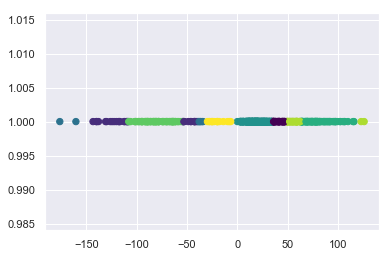

In [12]:
from sklearn.mixture import GMM
gmm = GMM(n_components=cc, n_iter=20, covariance_type='full').fit(X)
labels = gmm.predict(X)
print(gmm.converged_)

plt.scatter(X[:, 0], len(X)*[1], c=labels, s=40, cmap='viridis');

In [13]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.2   0.    0.263 0.01  0.266 0.081 0.    0.147 0.034]
 [0.35  0.    0.024 0.011 0.019 0.229 0.    0.321 0.046]
 [0.047 0.    0.407 0.005 0.491 0.009 0.    0.025 0.014]
 [0.    0.292 0.    0.135 0.    0.    0.505 0.    0.068]
 [0.    0.319 0.    0.194 0.    0.    0.362 0.    0.125]]


In [23]:
labels

array([4, 0, 4, 6, 6, 6, 4, 4, 4, 6, 6, 6, 2, 7, 4, 4, 4, 4, 4, 4, 4, 5,
       5, 5, 4, 0, 4, 1, 8, 6, 7, 5, 0, 7, 5, 7, 4, 4, 4, 4, 0, 4, 4, 4,
       4, 8, 1, 8, 4, 7, 0, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 7, 4, 7, 0, 0,
       4, 4, 4, 4, 7, 4, 4, 0, 4, 4, 4, 4, 6, 6, 6, 1, 6, 1, 4, 7, 4, 4,
       4, 4, 7, 5, 5, 4, 4, 4, 1, 3, 6, 5, 5, 7, 4, 4, 4, 0, 0, 4, 4, 4,
       4, 4, 4, 4, 4, 0, 4, 4, 0, 4, 5, 5, 5, 4, 4, 4, 0, 7, 4, 4, 4, 4,
       8, 8, 8, 5, 5, 5, 5, 5, 7, 4, 2, 4, 5, 5, 7, 8, 8, 4, 4, 0, 7, 5,
       5, 7, 4, 4, 4, 4, 4, 4, 6, 6, 6, 0, 7, 4, 6, 1, 6, 4, 4, 4, 6, 1,
       6, 4, 4, 4, 4, 4, 4, 4, 0, 4, 6, 1, 6, 4, 4, 4, 4, 4, 4, 5, 5, 5,
       4, 4, 4, 0, 5, 0, 4, 4, 4, 4, 4, 4, 5, 5, 7, 4, 4, 4, 4, 7, 4, 3,
       8, 3, 5, 5, 5, 4, 4, 4, 7, 5, 7, 4, 4, 4, 7, 5, 7, 4, 4, 4, 4, 4,
       4, 6, 6, 6, 4, 4, 4, 0, 7, 0, 5, 5, 5, 4, 4, 4, 6, 6, 6, 7, 5, 5,
       4, 4, 4, 5, 5, 7, 4, 4, 4, 5, 5, 5, 4, 4, 4, 6, 1, 6, 7, 5, 5, 4,
       4, 4, 5, 5, 5, 4, 0, 4, 4, 4, 4, 1, 3, 3, 5,

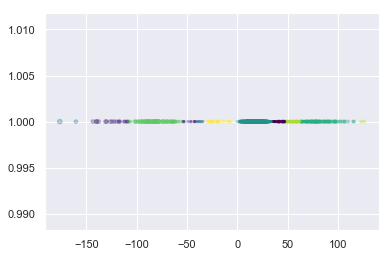

In [22]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], len(X)*[1], c=labels, cmap='viridis', s=size, alpha=0.3);

[(0.267004, 0.004874, 0.329415, 1.0), (0.278826, 0.17549, 0.483397, 1.0), (0.229739, 0.322361, 0.545706, 1.0), (0.172719, 0.448791, 0.557885, 1.0), (0.127568, 0.566949, 0.550556, 1.0), (0.157851, 0.683765, 0.501686, 1.0), (0.369214, 0.788888, 0.382914, 1.0), (0.678489, 0.863742, 0.189503, 1.0), (0.993248, 0.906157, 0.143936, 1.0)]


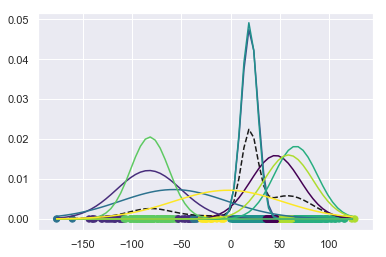

In [15]:
import scipy.stats as ss
from matplotlib import cm
from numpy import linspace

means   = gmm.means_.flatten()
stdevs  = [ np.sqrt(x) for x in gmm.covars_.flatten() ]
weights = gmm.weights_.flatten()

x = np.arange(min(X), max(X), 5)

pdfs = [p * ss.norm.pdf(x, mu, sd) for mu, sd, p in zip(means, stdevs, weights)]

density = np.sum(np.array(pdfs), axis=0)
plt.plot(x, density, 'k--')
plt.scatter(X[:, 0], len(X)*[0], c=labels, s=40, cmap='viridis');

start = 0.0
stop = 1.0
number_of_lines= cc
cm_subsection = np.linspace(start, stop, number_of_lines) 
colors = [ cm.viridis(x) for x in cm_subsection ]
print(colors)

for i, (mu, sd, p) in enumerate(zip(means, stdevs, weights)):
    plt.plot(x, ss.norm.pdf(x, mu, sd), color=colors[i])

In [16]:
means

array([ 45.62153523, -82.87812149,  19.35819783, -57.78026303,
        18.9872046 ,  66.03259951, -81.97767347,  58.77330327,
        -2.92834998])

In [17]:
weights

array([0.11723536, 0.06214535, 0.19281681, 0.04572116, 0.22513026,
       0.11163774, 0.06976097, 0.12725084, 0.0483015 ])

In [18]:
gmm.covars_

array([[[ 629.67613808]],

       [[1080.44152221]],

       [[  70.08769418]],

       [[2931.85937   ]],

       [[  65.71905382]],

       [[ 479.74472509]],

       [[ 377.4967075 ]],

       [[ 619.31938905]],

       [[3080.25284192]]])

In [19]:
# probs = gmm.predict_proba(X)

# cap=20
# for x,y,z in zip(labels[0:cap],cross_labels[0:cap],probs):
#     print(x,y,z)

xe = 0.
xe_all = []
for row, (gprob, lprob) in enumerate(zip(probs, cross_labels)):
    xe_ent = 0.
    for idx in range(len(gprob)):
        xe_ent -= lprob[idx] * np.log(gprob[idx])
    xe_all.append(xe_ent)
xe = sum(xe_all)/len(xe_all)
xe

9.544428338014212

In [21]:
len(gmm.covars_)

9